## Implementation of CNN from scratch

<img src='cnn.png'>

Firstly I decide to define how to work CNN

<img src='cnn_scratch.png'>

## Read data

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
train, test = mnist.load_data()

In [106]:
X_test, y_test = test
X_train, y_train = train

X_train.shape

(60000, 28, 28)

In [4]:
X_train[0].shape

(28, 28)

image shape:  (28, 28)


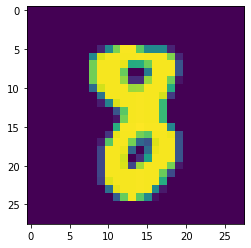

In [226]:
img = X_train[np.random.randint(5999)]
print('image shape: ',img.shape)
plt.imshow(img)
plt.show()

## CNN

In [227]:
class conv2d:
    
    def __init__(self, num_filters, filter_size):
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.filter = np.random.randn(num_filters, filter_size, filter_size) / (filter_size * filter_size) 
    
    def img_region(self, image):
        h, w = image.shape
        self.image = image
        for i in range(h - self.filter_size + 1):
            for j in range(w - self.filter_size + 1):
                image_reg = image[i : i + self.filter_size, j : j + self.filter_size]
                yield image_reg, i, j
    
    def forward_propagation(self, image):
        h, w = image.shape
        output = np.zeros((h - self.filter_size + 1, w - self.filter_size + 1, self.num_filters))
        for image_reg, i, j in self.img_region(img):
            output[i, j] = np.sum(image_reg * self.filter, axis=(1, 2))
        return output
    
    def backward_propagation(self):
        pass

In [252]:
conv = conv2d(3, 3)
out = conv.forward_propagation(img)
out.shape

(26, 26, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


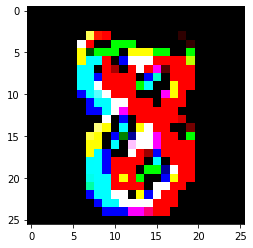

In [253]:
plt.imshow(out)
plt.show()

In [254]:
class Max_Pool:
    
    def __init__(self, filter_size):
        self.filter_size = filter_size
    
    def img_region(self, image):
        n_h = image.shape[0] // self.filter_size
        n_w = image.shape[1] // self.filter_size
        self.image = image
        
        for i in range(n_h):
            for j in range(n_w):
                image_reg = image[(i * self.filter_size) : (i * self.filter_size + self.filter_size), (j * self.filter_size): (j * self.filter_size + self.filter_size)]
                yield image_reg, i, j

    def forward_propagation(self, image):
        h, w, num_filters = image.shape
        output = np.zeros((h // self.filter_size, w // self.filter_size, num_filters))
        for image_reg, i, j in self.img_region(image):
            output[i, j] = np.amax(image_reg, axis = (0, 1))
        return output
        
    def backward_propagation(self):
        pass

In [264]:
pooling = Max_Pool(2)
output = pooling.forward_propagation(out)
output.shape
n, h, w = output.shape[0], output.shape[1], output.shape[2]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


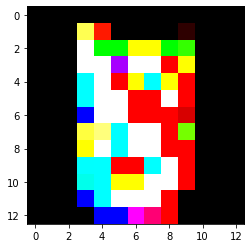

In [265]:
plt.imshow(output)
plt.show()

In [266]:
class ReLu:
    
    def __init__(self, input_items, relu_item):
        self.weight = np.random.randn(input_items, relu_item) / input_items
        self.bias = np.zeros(relu_item)
        
    def forward_propagation(self, image):
        relu_res = []
        image_modified = image.flatten()
        output_val = np.dot(image_modified, self.weight) + self.bias
        out = [max(0, x) for x in output_val]
        relu_res.append(out)
        return np.array(relu_res)

In [267]:
outputs = 10
relu = ReLu(n*h*w, outputs)
out3 = relu.forward_propagation(output)
print(out3)

[[1.0128649  0.0417172  0.         0.22147292 0.         0.
  0.         0.32980542 0.         0.        ]]
